In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

unmapped = pd.read_csv('~\\Documents\\Bioinformatics\\unmapped.csv')
unmapped=unmapped.dropna()  
unmapped

,Tool,Unmapped
0,blasr,N
1,blat,N
2,bowtie,N
3,bowtie2,Y
4,bwa,Y
5,erne,Y
6,exonerate,N
7,graphmap,Y
8,gsnap,Y
9,hisat2,Y


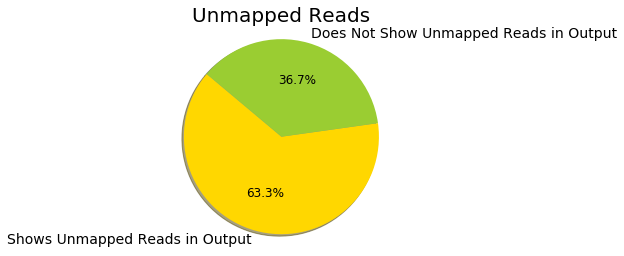

In [4]:
plt.rcParams['font.size'] = 12

numUnmapped=unmapped[(unmapped.Unmapped=='Y')].count()["Unmapped"]
numNoUnmapped=unmapped[(unmapped.Unmapped=='N')].count()["Unmapped"]

labels = 'Shows Unmapped Reads in Output' , 'Does Not Show Unmapped Reads in Output'
sizes = [numUnmapped,numNoUnmapped]
colors = ['gold', 'yellowgreen']
fig1, ax1 = plt.subplots()

ax1.set_title("Unmapped Reads",fontsize=20)
patches, texts, autotexts=ax1.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

texts[0].set_fontsize(14)
texts[1].set_fontsize(14)

plt.axis('equal')
plt.show()


In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

shortest = pd.read_csv('~\\Documents\\Bioinformatics\\shortest.csv')
shortest = shortest.dropna()
shortest
#Tools that only do long reads excluded

,Tool,Shortest
0,blasr,0
1,blat,0
2,bowtie2,10
3,bowtie,10
4,bwa,30
5,erne,30
6,exonerate,0
7,graphmap,80
8,gsnap,20
9,hisat2,20


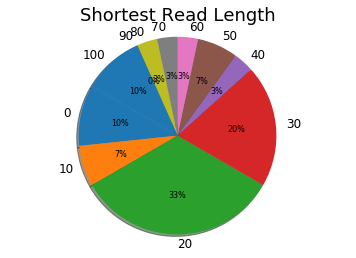

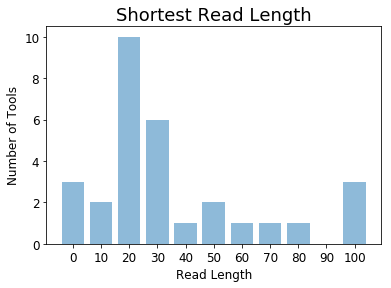

In [8]:
plt.rcParams['font.size'] = 8

#Read length of 100 means that the output shows all reads are unmapped
#Read length of 0 means that there is not output (empty output)

sizes = list()
labels = list()
for i in range(0,110,10):
    sizes.append(shortest[(shortest.Shortest==i)].count()["Shortest"])
    labels.append(str(i))
    
#Pie Chart
fig1, ax1 = plt.subplots()
ax1.set_title("Shortest Read Length",fontsize=18)

patches,texts,autotexts = plt.pie(sizes, labels=labels, 
        autopct='%1.f%%', shadow=True, startangle=150)
for text in texts:
    text.set_fontsize(12)
plt.axis('equal')
plt.show()

#Bar Graph
plt.rcParams['font.size'] = 12

y_pos = np.arange(len(sizes))
 
plt.bar(y_pos, sizes, align='center', alpha=0.5)
plt.xticks(y_pos, labels)
plt.ylabel('Number of Tools')
plt.xlabel('Read Length')
plt.title('Shortest Read Length',fontsize=18)
 
plt.show()

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

multi = pd.read_csv('~\\Documents\\Bioinformatics\\multimapped.csv')
multi=multi.dropna()  
multi

,Tools,Multimapped
0,blasr,1
1,blat,19
2,bowtie2,1
3,bowtie,1
4,bwa,1
5,erne,0
6,exonerate,19
7,graphmap,1
8,gsnap,20
9,hisat2,5


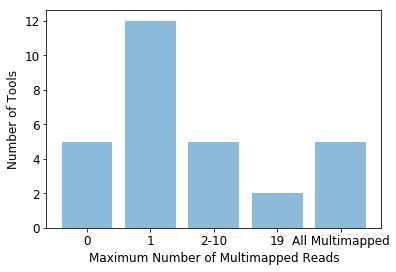

In [14]:
sizes = list()
labels = list()

labels.append(0)
sizes.append(multi[(multi.Multimapped==0)].count()["Multimapped"])
labels.append(1)
sizes.append(multi[(multi.Multimapped==1)].count()["Multimapped"])
labels.append("2-10")
sizes.append(multi[(multi.Multimapped<=10) & (multi.Multimapped>1)].count()["Multimapped"])
labels.append("19")
sizes.append(multi[(multi.Multimapped==19)].count()["Multimapped"])
labels.append("All Multimapped")
sizes.append(multi[(multi.Multimapped==20)].count()["Multimapped"])
    
#Bar Graph
plt.rcParams['font.size'] = 12

y_pos = np.arange(len(sizes))
 
plt.bar(y_pos, sizes, align='center', alpha=0.5)
plt.xticks(y_pos, labels)
plt.ylabel('Number of Tools')
plt.xlabel('Maximum Number of Multimapped Reads')
 
plt.show()

#0 means only outputs R1 uniquely mapped read (read mapped to 20 places, 0 output)
#1 means outputs at most one multimapped read (read mapped to 20 places, 1 output)
#2-10 means outputs up until x number of multimapped reads (read mapped to 20 places, x outputs)
#19 means weird output - 
#20 means outputs all multimapped reads (read mapped to 20 places, 20 outputs)